# Example 9.0.1-9.1.6 Blasting

Author: Marcel Steiner-Curtis \
Date: 03.03.2019 sml, 05.03.2021 sml: Python-Jupyter Notebook

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import scipy as scp

## Example 9.0.1 Blasting

read data

In [8]:
os.chdir('../04 Datasets')
data = pd.read_csv('blasting.dat', delimiter='\t')
data.head()

,Position,Charge,Distance,Vibration
0,1,2.18,188,0.32
1,1,3.33,183,0.53
2,1,3.33,177,0.50
3,2,3.33,53,6.71
4,2,3.12,49,5.99


define new log10-transformed variables

In [9]:
data['Chargelog']    = np.log10(data.Charge)
data['Distancelog']  = np.log10(data.Distance)
data['Vibrationlog'] = np.log10(data.Vibration)

Scatter diagram: Vibration versus Distance, size=Charge

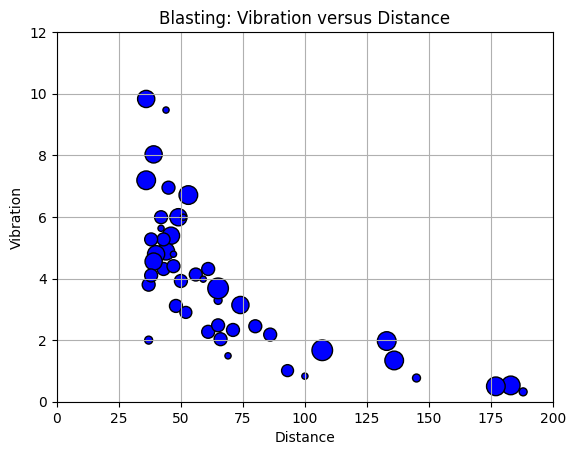

In [10]:
plt.close()
Chargeprop = (data.Charge-min(data.Charge))/max(data.Charge-min(data.Charge))
plt.xlim([0,200])
plt.ylim([0,12])
plt.scatter(data.Distance, data.Vibration, 
            marker='o', color='blue', edgecolor='black', 
            s=200*(Chargeprop+0.1))
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Blasting: Vibration versus Distance')
plt.xlabel('Distance')
plt.ylabel('Vibration')
plt.show()

##  Example 9.1.1 Estimation

### estimation of the parameters <span style="color:red">(explicit formulae)</span>

In [11]:
n = data.shape[0];   n

48

vector of the observations

In [12]:
y = data.Vibrationlog
len(y)

48

matrix of the levels of the regressor variables

In [13]:
X = np.vstack(([1]*n, data.Distancelog, data.Chargelog)).T
X.shape

(48, 3)

In [14]:
X

array([[1.        , 2.27415785, 0.33845649],
       [1.        , 2.26245109, 0.52244423],
       [1.        , 2.24797327, 0.52244423],
       [1.        , 1.72427587, 0.52244423],
       [1.        , 1.69019608, 0.49415459],
       [1.        , 1.66275783, 0.49415459],
       [1.        , 1.64345268, 0.49415459],
       [1.        , 1.62324929, 0.41497335],
       [1.        , 1.62324929, 0.31806333],
       [1.        , 1.64345268, 0.31806333],
       [1.        , 1.65321251, 0.41497335],
       [1.        , 1.68124124, 0.41497335],
       [1.        , 1.69897   , 0.41497335],
       [1.        , 2.02938378, 0.56110138],
       [1.        , 2.        , 0.31806333],
       [1.        , 1.96848295, 0.39794001],
       [1.        , 1.93449845, 0.41497335],
       [1.        , 1.90308999, 0.41497335],
       [1.        , 1.86923172, 0.49415459],
       [1.        , 1.85125835, 0.41497335],
       [1.        , 1.83884909, 0.31806333],
       [1.        , 1.81954394, 0.41497335],
       [1.

least-squares estimator

In [15]:
betahat = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y);   betahat

array([ 2.83225525, -1.51071284,  0.80834385])

### estimation of the parameters <span style="color:red">(smf.ols)</span>

In [16]:
mod = smf.ols(formula='Vibrationlog ~ Distancelog + Chargelog', data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:           Vibrationlog   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     92.79
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.08e-16
Time:                        20:33:59   Log-Likelihood:                 23.579
No. Observations:                  48   AIC:                            -41.16
Df Residuals:                      45   BIC:                            -35.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8323      0.223     12.707      

## Example 9.1.2 Tests on the Significance of any Individual Regression Coefficient

hat matrix

In [17]:
H = np.matmul(np.matmul(X, np.linalg.inv(np.matmul(X.T,X))), X.T)
H.shape

(48, 48)

mean of all leverages is p/n (cf. Chap. 10.2)

In [18]:
np.diag(H).mean()-(1+2)/data.shape[0]

-5.204170427930421e-16

fitted values

In [19]:
Vibrationloghat = np.matmul(H, y)

residuals

In [20]:
res = data.Vibrationlog - Vibrationloghat

error sum of squares

In [21]:
sigma2hat = sum(res**2)/(data.shape[0]-3)

residual standard error

In [22]:
np.sqrt(sigma2hat)

0.15291019632128047

three standard errors

In [23]:
sebeta = np.sqrt(sigma2hat) * np.sqrt(np.diag(np.linalg.inv(np.matmul(X.T,X))));   sebeta

array([0.2228918 , 0.11114721, 0.30417236])

null hypothesis

In [24]:
beta0 = [0]*3

three test statistics

In [25]:
Testbeta = (betahat-beta0)/sebeta;   Testbeta

array([ 12.70686176, -13.59200002,   2.65751909])

three $P$-values

In [26]:
2*(1-scp.stats.t.cdf(np.abs(Testbeta), df=n-3))

array([2.22044605e-16, 0.00000000e+00, 1.08572500e-02])

## Example 9.1.3 Confidence Intervals on the Regression Coefficient

significance level

In [27]:
alpha = 0.05

three 95% confidence intervals <span style="color:red">(explicit formulae)</span>

In [28]:
tcrit = scp.stats.t.ppf(1-alpha/2, df=data.shape[0]-3);   tcrit

2.0141033848332923

In [29]:
CI = np.vstack((betahat - tcrit*sebeta, betahat + tcrit*sebeta))
CI

array([[ 2.38332812, -1.73457481,  0.19570927],
       [ 3.28118237, -1.28685088,  1.42097843]])

three 95% confidence intervals <span style="color:red">(smf.ols)</span>

In [30]:
mod.conf_int(alpha=alpha)

,0,1
Intercept,2.383328,3.281182
Distancelog,-1.734575,-1.286851
Chargelog,0.195709,1.420978


## Example 9.1.4 Confidence Interval of the Response

confidence interval of the response <span style="color:red">(explicit formulae)</span>

In [31]:
x0 = np.array([1, np.log10(50), np.log10(3.0)])
y0hat  = np.matmul(x0, betahat)
seconf = np.sqrt(sigma2hat * np.matmul(np.matmul(x0, np.linalg.inv(np.matmul(X.T,X))), x0))
10**(y0hat + np.array([0,-1,1])*scp.stats.t.ppf(1-alpha/2, df=data.shape[0]-3)*seconf)

array([4.47999438, 3.91036534, 5.13260218])

define new point

In [32]:
datanew = pd.DataFrame(data={'Distancelog': [np.log10(50)], 'Chargelog': [np.log10(3.0)]})

predict <span style="color:red">(smf.ols)</span>

In [33]:
VibrationlogConf = mod.get_prediction(datanew).summary_frame(alpha=0.05)
10**VibrationlogConf

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.479994,1.069851,3.910365,5.132602,2.17615,9.222873


## Example 9.1.5 Prediction Interval

prediction interval of the response <span style="color:red">(explicit formulae)</span>

In [34]:
sepred = np.sqrt(sigma2hat + seconf**2)
10**(y0hat + np.array([0,-1,1])*scp.stats.t.ppf(1-alpha, df=data.shape[0]-3)*sepred)

array([4.47999438, 2.45355949, 8.18009497])

predict <span style="color:red">(smf.ols)</span> (one-sided, thereforealpha=0.1)

In [35]:
VibrationlogConf = mod.get_prediction(datanew).summary_frame(alpha=0.1)
10**VibrationlogConf

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.479994,1.069851,3.999734,5.017921,2.453559,8.180095


## Example 9.1.6 Coefficient of Determination, Multiple $R$-squared

multiple $R$-squared <span style="color:red">(explicit formulae)</span>

In [36]:
np.corrcoef(data.Vibrationlog, mod.fittedvalues.values)**2

array([[1.       , 0.8048385],
       [0.8048385, 1.       ]])

multiple $R$-squared <span style="color:red">(smf.ols)</span>

In [37]:
mod.rsquared

0.804838496687501